##drive mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the Homework directory in your Google Drive
%cd /content/drive/MyDrive/Applied AI/AI Project 2024-2025

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1Ng-U4g8su7jEQM-fjMtbVxvsiHYrRyQu/AI Project 2024-2025


##importing libraries

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

import tensorflow as tf
from tensorflow import keras as tfk
#import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
#from keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")
# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec
import os

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

Tensorflow version -> 2.18.0
Keras version -> 3.8.0
2.18.0


##loading data

In [ ]:
data_path='dataset_lung.xlsx'
df=pd.read_excel(data_path)
df.head()

Full_slice            Nodule  TumorClass
0  pat1_fullslice.nrrd  pat1_nodule.nrrd           5
1  pat2_fullslice.nrrd  pat2_nodule.nrrd           5
2  pat3_fullslice.nrrd  pat3_nodule.nrrd           2
3  pat4_fullslice.nrrd  pat4_nodule.nrrd           5
4  pat5_fullslice.nrrd  pat5_nodule.nrrd           4

In [ ]:
# Verificare la presenza di duplicati
duplicati = df.duplicated().sum()
print(f"Numero di duplicati nel dataset: {duplicati}")

Numero di duplicati nel dataset: 0


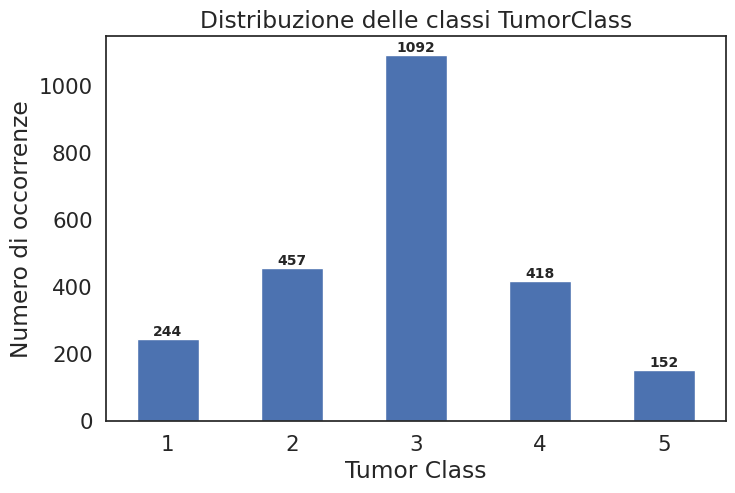

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contare la distribuzione delle classi nella colonna TumorClass e ordinarle per valore della classe (X)
distribuzione_classi = df['TumorClass'].value_counts().sort_index()

# Visualizzare graficamente la distribuzione delle classi ordinate per valore della classe (X)
plt.figure(figsize=(8, 5))
ax = distribuzione_classi.plot(kind='bar')

# Aggiungere il numero di istanze sopra ogni barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Tumor Class")
plt.ylabel("Numero di occorrenze")
plt.title("Distribuzione delle classi TumorClass")
plt.xticks(rotation=0)  # Mantiene le etichette dritte
plt.show()



In [ ]:
patients=(df.shape[0])
patients

2363

In [ ]:
!pip install pynrrd
import nrrd

In [ ]:
!pip install SimpleITK
import SimpleITK as sitk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 18.4 MB/s eta 0:00:00


In [ ]:
# Funzione per ridimensionare un'immagine
def resize_image(image, target_shape):
    sitk_image = sitk.GetImageFromArray(image)
    resampler = sitk.ResampleImageFilter()
    resampler.SetOutputSpacing([old_dim / new_dim for old_dim, new_dim in zip(image.shape, target_shape)])
    resampler.SetSize(target_shape)
    resampler.SetInterpolator(sitk.sitkLinear)
    resized_image = sitk.GetArrayFromImage(resampler.Execute(sitk_image))
    return resized_image

In [ ]:
import os
import nrrd

folder_path = "Train"
target_shape = (128, 128)

images = []
titles = []

# Funzione per estrarre il numero del paziente dal nome del file
def get_patient_number(file_name):
    return int(file_name.split('_')[0].replace('pat', ''))

# Ordina i file in base al numero del paziente
file_list = sorted(
    [f for f in os.listdir(folder_path) if f.endswith("nodule.nrrd")],
    key=get_patient_number
)


# Itera sui file ordinati
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    print(f"Processing file: {file_name}")

    # Leggi il file NRRD
    data, header = nrrd.read(file_path)
    data = resize_image(data, target_shape)

    # Salva il titolo e l'immagine nella stessa posizione
    titles.append(file_name)
    images.append(data)

# Ora images[i] corrisponde sempre a titles[i]


Processing file: pat1_nodule.nrrd
Processing file: pat2_nodule.nrrd
Processing file: pat3_nodule.nrrd
Processing file: pat4_nodule.nrrd
Processing file: pat5_nodule.nrrd
Processing file: pat6_nodule.nrrd
Processing file: pat7_nodule.nrrd
Processing file: pat8_nodule.nrrd
Processing file: pat9_nodule.nrrd
Processing file: pat10_nodule.nrrd
Processing file: pat11_nodule.nrrd
Processing file: pat12_nodule.nrrd
Processing file: pat13_nodule.nrrd
Processing file: pat14_nodule.nrrd
Processing file: pat15_nodule.nrrd
Processing file: pat16_nodule.nrrd
Processing file: pat17_nodule.nrrd
Processing file: pat18_nodule.nrrd
Processing file: pat19_nodule.nrrd
Processing file: pat20_nodule.nrrd
Processing file: pat21_nodule.nrrd
Processing file: pat22_nodule.nrrd
Processing file: pat23_nodule.nrrd
Processing file: pat24_nodule.nrrd
Processing file: pat25_nodule.nrrd
Processing file: pat26_nodule.nrrd
Processing file: pat27_nodule.nrrd
Processing file: pat28_nodule.nrrd
Processing file: pat29_nodule

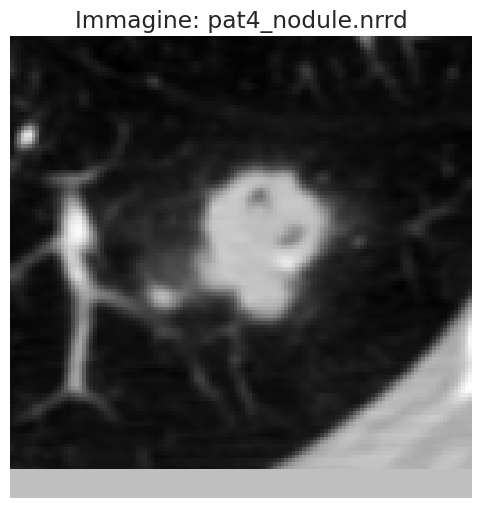

In [ ]:
import matplotlib.pyplot as plt

# Indice dell'immagine da visualizzare
index = 3  # Cambia questo valore per visualizzare altre immagini

# Visualizza l'immagine con il titolo corrispondente
plt.figure(figsize=(6,6))  # Imposta una dimensione adatta
plt.imshow(images[index], cmap="gray")  # Mostra l'immagine in scala di grigi
plt.title(f"Immagine: {titles[index]}")  # Mostra il titolo corrispondente
plt.axis("off")  # Nasconde gli assi per una migliore visualizzazione
plt.show()


In [ ]:
df.head()

Full_slice            Nodule  TumorClass
0  pat1_fullslice.nrrd  pat1_nodule.nrrd           5
1  pat2_fullslice.nrrd  pat2_nodule.nrrd           5
2  pat3_fullslice.nrrd  pat3_nodule.nrrd           2
3  pat4_fullslice.nrrd  pat4_nodule.nrrd           5
4  pat5_fullslice.nrrd  pat5_nodule.nrrd           4

In [ ]:
ordered_titles = df['Nodule'].tolist()
title_to_image = dict(zip(titles, images))
# Riordina le immagini in base all'ordine dei titoli nel DataFrame
ordered_images = [title_to_image[title] for title in ordered_titles]

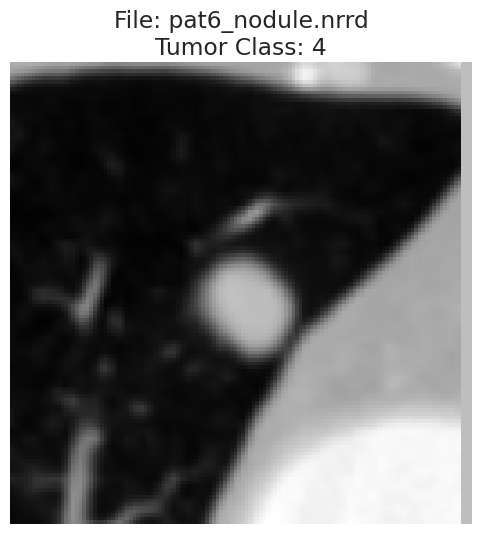

In [ ]:
import matplotlib.pyplot as plt

# Indice dell'immagine da visualizzare
index = 5  # Cambia questo valore per vedere altre immagini

# Recupera il titolo e l'informazione dal DataFrame
image_title = ordered_titles[index]  # Nome del file
tumor_class = df.loc[df['Nodule'] == image_title, 'TumorClass'].values[0]  # Estrai la classe del tumore

# Visualizza l'immagine con titolo e classe
plt.figure(figsize=(6,6))
plt.imshow(ordered_images[index], cmap="gray")  # Mostra l'immagine
plt.title(f"File: {image_title}\nTumor Class: {tumor_class}")  # Mostra il titolo + classe
plt.axis("off")  # Nasconde gli assi
plt.show()


In [ ]:
categorical_labels=df['TumorClass'].values
print(categorical_labels)

[5 5 2 ... 5 5 5]


In [ ]:
binary_labels=np.where((categorical_labels==1)|(categorical_labels==2|(categorical_labels==3)), 0, 1)
print(binary_labels)

[1 1 0 ... 1 1 1]


###visual inspection

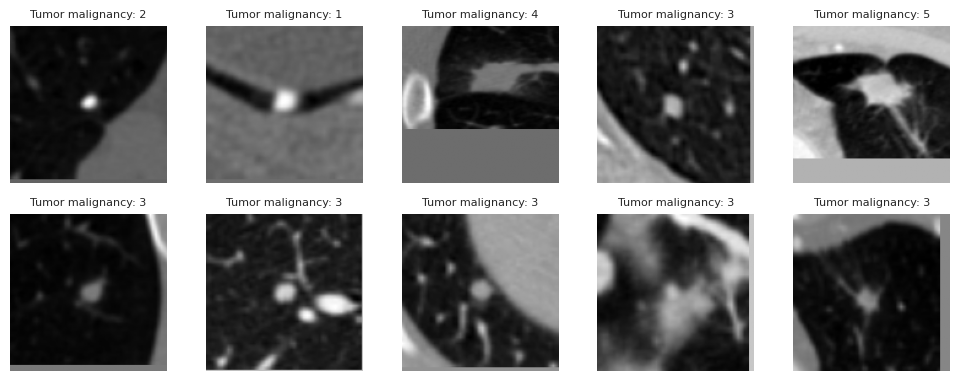

In [ ]:
X=np.array(ordered_images)
y=np.array(categorical_labels)
z=np.array(binary_labels)
# Number of images to display
num_images_to_display = 10

# Generate 10 random indices from the range of available data
random_indices = np.random.choice(min(len(X), len(y)), num_images_to_display, replace=False)

# Set up a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns

for idx, i in enumerate(random_indices):
    row = idx // 5  # Determine row index (0 or 1)
    col = idx % 5   # Determine column index (0 to 4)

    axs[row, col].imshow(np.squeeze(X[i]), cmap='gray')
    axs[row, col].set_title(f'Tumor malignancy: {y[i]}', fontsize=8)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print(y)
y.shape

[5 5 2 ... 5 5 5]


(2363,)

In [ ]:
classes=['1','2','3','4','5']
#Check class numerosity
# Get shapes for each class in y_train
y=y-1
for class_idx, class_name in enumerate(classes):
    y_class = y[y == class_idx]
    print(f"Numerosity of {class_name} images in training set: {y_class.shape[0]}")

print("\n")

Numerosity of 1 images in training set: 244
Numerosity of 2 images in training set: 457
Numerosity of 3 images in training set: 1092
Numerosity of 4 images in training set: 418
Numerosity of 5 images in training set: 152




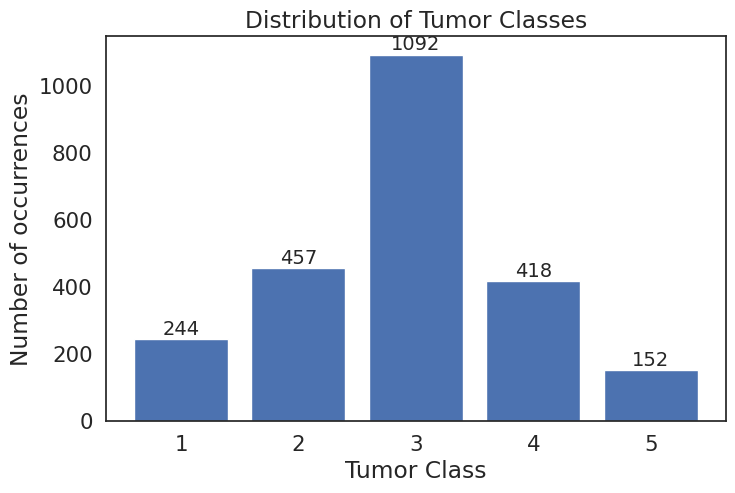

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable (categorical_labels in your code)
# and 'classes' is a list of class names.

# Count the occurrences of each class
class_counts = np.bincount(y)

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(classes, class_counts)

# Add the numbers on top of the bars
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel("Tumor Class")
plt.ylabel("Number of occurrences")
plt.title("Distribution of Tumor Classes")
plt.show()


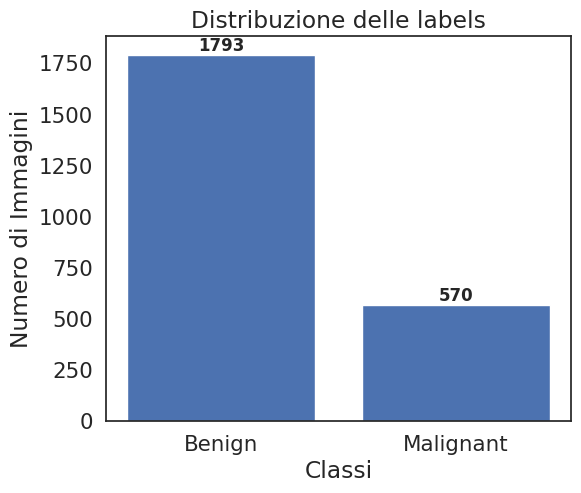

In [ ]:
# Definizione delle classi
cat_classes = ['Benign', 'Malignant']

# Conta il numero di occorrenze per ciascuna classe
class_counts = [np.sum(z == class_idx) for class_idx in range(len(cat_classes))]

# Creazione del grafico a barre
plt.figure(figsize=(6, 5))
ax = plt.bar(cat_classes, class_counts)

# Aggiunta dei valori sopra ogni barra
for p in ax:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titoli e etichette
plt.xlabel("Classi")
plt.ylabel("Numero di Immagini")
plt.title("Distribuzione delle labels")
plt.show()

In [ ]:
# prompt: one-hot encoda y_train, y_test ed y_val

from sklearn.preprocessing import OneHotEncoder

# Assuming y, y_train, y_test, and y_val are defined in your previous code

# Create an instance of OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on your target variable 'y'
# (this is important to ensure consistent encoding across train/val/test splits)
enc.fit(y.reshape(-1,1))

# Transform the target variables
y_encoded = enc.transform(y.reshape(-1,1)).toarray()

# Example usage (assuming y_train, y_test, y_val are already defined):
#y_train_encoded = enc.transform(y_train.reshape(-1,1)).toarray()
#y_test_encoded = enc.transform(y_test.reshape(-1,1)).toarray()
#y_val_encoded = enc.transform(y_val.reshape(-1,1)).toarray()

y_encoded


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

###Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_autoencoder(input_shape=(128, 128, 1)):
    # Input dell'immagine
    input_img = tf.keras.Input(shape=input_shape)

    # =======================
    #       ENCODER
    # =======================
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # =======================
    #       DECODER
    # =======================

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Add a Cropping2D layer to adjust the output size
    decoded = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(x)

    # Costruzione del modello autoencoder
    autoencoder = models.Model(inputs=input_img, outputs=decoded)

    # Compilazione del modello con ottimizzatore Adam e funzione di perdita adatta a immagini normalizzate
    autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


    return autoencoder

# Costruisci e mostra il sommario del modello
autoencoder = build_autoencoder(input_shape=(128, 128, 1))
autoencoder.summary()

In [ ]:
# Addestra il modello
history = autoencoder.fit(
    X,         # Input
    X,         # Target (l'autoencoder cerca di ricostruire l'input)
    epochs=50,       # Numero di epoche (puoi aumentare o diminuire in base al dataset)
    batch_size=32,   # Dimensione del batch
    shuffle=True,    # Mescola i dati ad ogni epoca
)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Supponiamo che il tuo autoencoder sia già addestrato e si chiami "autoencoder"

# 1. Carica e preprocessa l'immagine
# Carica l'immagine in scala di grigi (se necessario)

img=X_preprocessed[0]
# Espandi le dimensioni per adattare l'input del modello: (1, 64, 64, 1)
img_input = np.expand_dims(img, axis=-1)  # aggiunge il canale
img_input = np.expand_dims(img_input, axis=0)    # aggiunge la dimensione batch

# 2. Passa l'immagine attraverso l'autoencoder
reconstructed = autoencoder.predict(img_input)

# Il risultato ha forma (1, 64, 64, 1), estraiamo l'immagine ricostruita
reconstructed_img = reconstructed[0, :, :, 0]

# 3. Visualizza l'immagine originale e quella ricostruita
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Immagine Originale")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Immagine Ricostruita")
plt.imshow(reconstructed_img, cmap="gray")
plt.axis("off")

plt.show()


In [ ]:
from tensorflow.keras.models import Model

# Crea il modello encoder: input uguale a quello dell'autoencoder e output il layer latente
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("max_pooling2d_5").output)
encoder.summary()


In [ ]:
# Estrai le rappresentazioni latenti (feature map) per tutte le immagini
latent_maps = encoder.predict(X)

# Poiché la feature map è 3D per immagine, la appiattiamo per ottenere un vettore
n_samples = latent_maps.shape[0]
latent_vectors = latent_maps.reshape(n_samples, -1)  # forma: (n_samples, 8*8*128)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Example: Let's assume 'data' is your high-dimensional dataset.
# For demonstration, we create synthetic data.
np.random.seed(42)

# Step 1: Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(latent_vectors)

# Step 2: Cluster the t-SNE output with DBSCAN
# Choose DBSCAN parameters: eps (neighborhood radius) and min_samples.
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_tsne)

# DBSCAN labels:
# - A label of -1 indicates a noise point (potential outlier)
# - Other labels (0, 1, ...) correspond to clusters

# Step 3: Visualize the results
plt.figure(figsize=(10, 7))
# Use a colormap that shows noise points in a distinctive color
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    # Create a mask for the points in the current cluster/outlier
    mask = dbscan_labels == label
    if label == -1:
        # Noise points (outliers) in red
        color = 'red'
        label_name = 'Outliers'
    else:
        # Cluster points in different colors
        color = plt.cm.viridis(float(label) / len(unique_labels))
        label_name = f'Cluster {label}'
    plt.scatter(data_tsne[mask, 0], data_tsne[mask, 1], c=color, label=label_name, s=50)

plt.title("t-SNE + DBSCAN for Outlier Identification")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

# Optionally, print out the indices of the detected outliers:
outlier_indices = np.where(dbscan_labels == -1)[0]
print("Indices of detected outliers:", outlier_indices)


In [ ]:
 import matplotlib.pyplot as plt

# Assuming 'X' contains your images, 'dbscan_labels' the cluster assignments,
# and 'outlier_indices' the indices of outliers from the previous code.

# Example usage:
# Assuming you have already executed the t-SNE and DBSCAN code.
# Replace with your actual variable names if needed.


def plot_images_with_labels(X, labels, cluster_label):
    num_images = len(X)
    num_cols = 3

    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
    fig.suptitle(f'Images for Cluster/Outliers: {cluster_label}', fontsize=16)

    # Check if axes is 1-dimensional or 2-dimensional
    if num_images < 3:  # If less than 3 images, axes is 1D
        for i in range(num_images):
            axes[i].imshow(X[i], cmap='gray')
            axes[i].set_title(f'Label: {labels[i]}')
            axes[i].axis('off')
    else:  # If 3 or more images, axes is 2D
        for i in range(num_images):
            row = i // num_cols
            col = i % num_cols
            axes[i].imshow(X[i], cmap='gray')
            axes[i].set_title(f'Label: {labels[i]}')
            axes[i].axis('off')

    # Hide any extra subplots
    for j in range(num_images, num_rows * num_cols):
        row = j // num_cols
        col = j % num_cols
        fig.delaxes(axes[row, col])  # Check if axes is 1D or 2D before calling delaxes

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate suptitle
    plt.show()


# Plot images for each cluster
for cluster in np.unique(dbscan_labels):
  if cluster != -1: # Skip the -1 for outliers
    cluster_indices = np.where(dbscan_labels == cluster)[0]
    cluster_images = X_preprocessed[cluster_indices]
    cluster_labels = y[cluster_indices]
    plot_images_with_labels(cluster_images[:3], cluster_labels[:3], cluster) # Plot only 3 per cluster


# Plot images for outliers
outlier_indices = np.where(dbscan_labels == -1)[0]
outlier_images = X[outlier_indices]
outlier_labels = y[outlier_indices]
plot_images_with_labels(outlier_images[:3], outlier_labels[:3], "Outliers") #Plot only 3 outliers


#Multiclass problem


##data processing

In [ ]:
min_val = np.min(X)
max_val = np.max(X)
X= (X - min_val) / (max_val - min_val).astype('float32')

In [ ]:
from PIL import Image

def center_crop(image_array, size):
    """Center crops an image to the specified size.

    Args:
        image_array: A NumPy array representing the image.
        size: A tuple (width, height) specifying the target size.

    Returns:
        A NumPy array representing the center-cropped image.
    """
    image = Image.fromarray(image_array)
    width, height = image.size
    target_width, target_height = size

    left = (width - target_width) // 2
    top = (height - target_height) // 2
    right = left + target_width
    bottom = top + target_height

    cropped_image = image.crop((left, top, right, bottom))
    return np.array(cropped_image)


# # Apply center crop to all images in X
# cropped_X = [center_crop(img, (96, 96)) for img in X] # Assuming 128x128 is the desired size. Adjust as needed

# X = np.array(cropped_X)

def resize_image(image_array, target_size):
    image = Image.fromarray(image_array)
    resized_image = image.resize(target_size)
    return np.array(resized_image)

# # Assuming X is your NumPy array of images
# X_resized = [resize_image(img, (128, 128)) for img in X]
# X = np.array(X_resized)



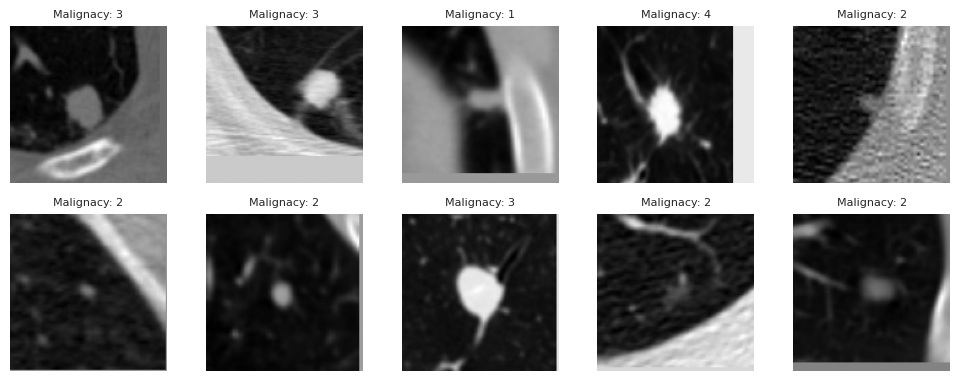

In [ ]:
num_images_to_display = 10

# Generate 10 random indices from the range of available data
random_indices = np.random.choice(min(len(X), len(z)), num_images_to_display, replace=False)

# Set up a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns

for idx, i in enumerate(random_indices):
    row = idx // 5  # Determine row index (0 or 1)
    col = idx % 5   # Determine column index (0 to 4)

    axs[row, col].imshow(np.squeeze(X[i]), cmap='gray')
    axs[row, col].set_title(f'Malignacy: {y[i]}', fontsize=8)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def sigmoidal_contrast(image, cutoff, gain=10):
    """
    Apply sigmoidal contrast enhancement to an image.

    Parameters:
        image (numpy.ndarray): Grayscale input image.
        cutoff (float): The gray value around which contrast is adjusted (e.g., the mean value).
        gain (float): Controls the slope of the sigmoid. Higher values increase contrast.

    Returns:
        numpy.ndarray: Image with enhanced contrast.
    """

    # Apply sigmoid function
    sigmoidal_image = 1 / (1 + np.exp(-gain * (image - cutoff )))

    # Rescale to range [0, 255] and convert to uint8
    enhanced_image = (sigmoidal_image).astype(np.float32)

    return enhanced_image


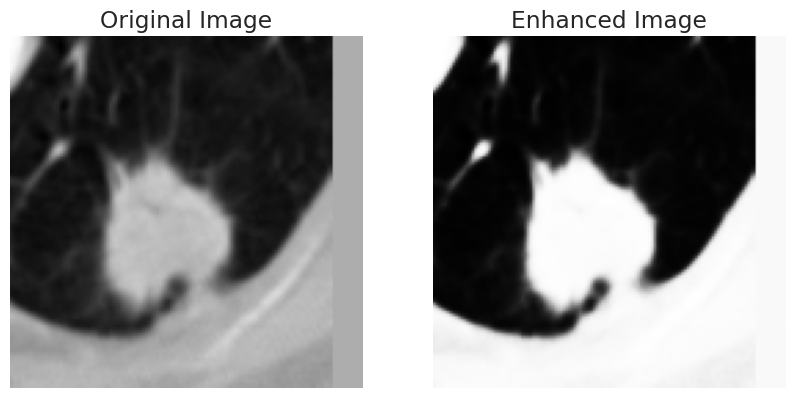

In [ ]:
# Calculate the mean gray value (cutoff)
image=X[0]
mean_value = np.mean(image)

# Apply sigmoidal contrast enhancement
enhanced_image = sigmoidal_contrast(image, cutoff=mean_value, gain=50)

# Display original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray") # Remove the extra index [:,:,0]
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_image, cmap="gray") # Remove the extra index [:,:,0] and rescale if necessary
plt.axis("off")

plt.show()

In [ ]:

def process_images(images, gain=10):
    """
    Apply sigmoidal contrast enhancement to a list of images.

    Parameters:
        images (list of numpy.ndarray): List of grayscale images.
        gain (float): Controls the slope of the sigmoid. Higher values increase contrast.

    Returns:
        list of numpy.ndarray: List of enhanced images.
    """
    enhanced_images = []
    for image in images:
        if image is None:
            print("Warning: Found a None image. Skipping.")
            continue

        # Calculate the mean gray value (cutoff)
        mean_value = np.mean(image)

        # Apply sigmoidal contrast enhancement
        enhanced_image = sigmoidal_contrast(image, cutoff=mean_value, gain=gain)
        enhanced_images.append(enhanced_image)

    return enhanced_images


In [ ]:

def process_images_in_batches(images, batch_size, gain=10):
    """
    Apply sigmoidal contrast enhancement to images in batches.

    Parameters:
        images (list of numpy.ndarray): List of grayscale images.
        batch_size (int): Number of images to process in each batch.
        gain (float): Controls the slope of the sigmoid. Higher values increase contrast.

    Returns:
        list of numpy.ndarray: List of enhanced images.
    """
    enhanced_images = []
    for i in tqdm(range(0, len(images), batch_size)):
        batch = images[i:i + batch_size]
        for image in batch:
            if image is None:
                print("Warning: Found a None image. Skipping.")
                continue

            # Calculate the mean gray value (cutoff)
            mean_value = np.mean(image)

            # Apply sigmoidal contrast enhancement
            enhanced_image = sigmoidal_contrast(image, cutoff=mean_value, gain=gain)
            enhanced_images.append(enhanced_image)

    return enhanced_images


In [ ]:
from tqdm import tqdm

In [ ]:
# Process images in batches

X = process_images_in_batches(X, batch_size=32, gain=10)
X=np.array(X)

100%|██████████| 74/74 [00:00<00:00, 271.26it/s]


##Splitting

In [ ]:
# Data splitting
#X_train_val, X_test, y_train_val, y_test = train_test_split(X_preprocessed, y_encoded, random_state=seed, test_size=0.1, stratify=y)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, random_state=seed, test_size=0.1, stratify=y_encoded) # Use y_encoded for stratification
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=seed, test_size=y_test.shape[0], stratify=y_train_val)

# Print the shapes of the resulting datasets
print("Training Data Shape:", X_train.shape)
print("Training Label Shape:", y_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Validation Label Shape:", y_val.shape)
print("Test Data Shape:", X_test.shape)
print("Test Label Shape:", y_test.shape)

Training Data Shape: (1889, 128, 128)
Training Label Shape: (1889, 5)
Validation Data Shape: (237, 128, 128)
Validation Label Shape: (237, 5)
Test Data Shape: (237, 128, 128)
Test Label Shape: (237, 5)


In [ ]:
import gc
del X, y, y_encoded

gc.collect()

28702

In [ ]:
print(f"Min value in X_train: {np.min(X_train*255)}")
print(f"Max value in X_train: {np.max(X_train*255)}")


Min value in X_train: 3.4866297245025635
Max value in X_train: 254.32440185546875


In [ ]:
# Count instances for each label in y_train
label_counts = np.sum(y_train, axis=0)

# Print the results
for i, count in enumerate(label_counts):
    print(f"Label {i}: {count} instances")


Label 0: 195.0 instances
Label 1: 365.0 instances
Label 2: 873.0 instances
Label 3: 334.0 instances
Label 4: 122.0 instances


In [ ]:
# prompt: compute class weights considering y_train is one_hot encoded

from sklearn.utils.class_weight import compute_class_weight

# Assuming y_train is your one-hot encoded target variable.
# First, convert the one-hot encoded labels back to integers.
y_train_integers = np.argmax(y_train, axis=1)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)

# Convert the class weights to a dictionary for use in model training
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)


Class Weights: {0: 1.9374358974358974, 1: 1.0350684931506848, 2: 0.4327605956471936, 3: 1.1311377245508982, 4: 3.09672131147541}


In [ ]:
#X_train=np.expand_dims(X_train, axis=-1)
#X_val=np.expand_dims(X_val, axis=-1)
#X_test=np.expand_dims(X_test, axis=-1)
#X_train.shape

In [ ]:
X_train=np.stack([X_train] * 3, axis=-1)
X_val=np.stack([X_val] * 3, axis=-1)
X_test=np.stack([X_test] * 3, axis=-1)
X_train.shape

(1889, 128, 128, 3)

##Upsampling

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import random

# Calculate the target count based on the most numerous class in `y_train`
unique, counts = np.unique(y_train.argmax(axis=1), return_counts=True)
class_counts = dict(zip(unique, counts))
target_count = max(class_counts.values()) + 200

# Initialize the data generator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare lists to store the augmented images and labels
augmented_images = []
augmented_labels = []

# Augment underrepresented classes in `X_train` until each reaches the target count
for class_label, count in class_counts.items():
    if count < target_count:
        # Filter `X_train` to get only images of the current class
        indices = np.where(y_train.argmax(axis=1) == class_label)[0]
        X_train_class = X_train[indices]

        # Calculate the number of augmentations needed
        num_augmentations = target_count - count

        i = 0
        while i < num_augmentations:
            # Randomly select an image from `X_train_class`
            img = random.choice(X_train_class)
            x = img.reshape((1,) + img.shape)  # Reshape to add batch dimension

            # Generate one augmented image
            for batch in datagen.flow(x, batch_size=1):
                augmented_images.append(batch[0])  # Add augmented image
                augmented_labels.append(class_label)  # Add class label
                i += 1
                break  # Generate only one augmented image per selected image

# Convert augmented data to NumPy arrays
augmented_images = np.array(augmented_images)
# Convert `augmented_labels` to one-hot encoding to match `y_train` shape
augmented_labels = to_categorical(augmented_labels, num_classes=y_train.shape[1])

# Append the augmented images and labels back to `X_train` and `y_train`
X_train_balanced = np.concatenate((X_train, augmented_images), axis=0)
y_train_balanced = np.concatenate((y_train, augmented_labels), axis=0)

# Verify the new class counts in `y_train_balanced`
unique_balanced, counts_balanced = np.unique(y_train_balanced.argmax(axis=1), return_counts=True)
class_counts_balanced = dict(zip(unique_balanced, counts_balanced))

# Print the final shape and counts of each class in `X_train_balanced`
print("Class counts after balancing:")
for class_label, count in class_counts_balanced.items():
    print(f"Class {class_label}: {count}")
print("\nFinal shapes:")
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")

X_train=np.array(X_train_balanced)
y_train=np.array(y_train_balanced)

Class counts after balancing:
Class 0: 1073
Class 1: 1073
Class 2: 1073
Class 3: 1073
Class 4: 1073

Final shapes:
X_train_balanced shape: (5365, 128, 128, 3)
y_train_balanced shape: (5365, 5)


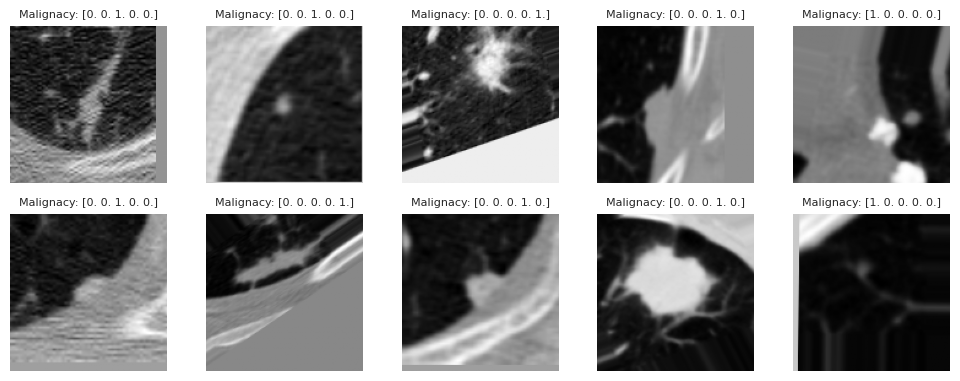

In [ ]:
num_images_to_display = 10

# Generate 10 random indices from the range of available data
random_indices = np.random.choice(min(len(X_train), len(y_train)), num_images_to_display, replace=False)

# Set up a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns

for idx, i in enumerate(random_indices):
    row = idx // 5  # Determine row index (0 or 1)
    col = idx % 5   # Determine column index (0 to 4)

    axs[row, col].imshow((X_train[i][:, :, 0]),cmap='gray')
    axs[row, col].set_title(f'Malignacy: {y_train[i]}', fontsize=8)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

##building the model

In [ ]:
# Input shape for the model
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = 5

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (128, 128, 3)
Output Shape: 5


In [ ]:
!pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.7 MB/s eta 0:00:00


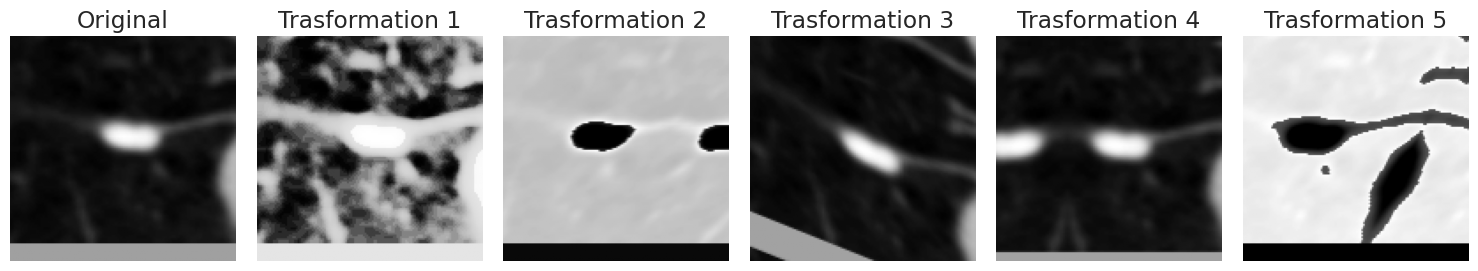

In [ ]:
import keras_cv

# Use correct parameters for AugMix
# augmentation_layers = keras_cv.layers.AugMix(
#     value_range=(0, 255),  # Adatta al range delle immagini (es. 0-1 o 0-255)
#     severity=0.5,  # Intensità delle trasformazioni (0-10)
#     num_chains=4,  # Numero di catene di trasformazioni
#     chain_depth=3,  # Profondità di ogni catena
#     alpha=1.0,  # Parametro di mixaggio
# )

augmentation_layers = keras_cv.layers.RandAugment(
    value_range=(0, 255),  # Adatta al range delle immagini (es. 0-1 o 0-255)
    magnitude=0.5,  # Intensità delle trasformazioni (0-10)
)

image = X_train[:5] * 255

# Applica la pipeline di augmentation all'immagine
augmented_images = []
for _ in range(5):  # Genera 5 trasformazioni per visualizzare la variazione
    augmented_image = augmentation_layers(image, training=True)
    augmented_images.append(augmented_image[0].numpy())  # Aggiungi la trasformazione alla lista

# Visualizza le immagini
plt.figure(figsize=(15, 5))

# Mostra l'immagine originale
plt.subplot(1, 6, 1)
plt.imshow(image[0][:, :, 0].astype(np.uint8), cmap='gray')
plt.title("Original")
plt.axis('off')

# Mostra le immagini trasformate
for i, aug_img in enumerate(augmented_images):
    plt.subplot(1, 6, i + 2)
    plt.imshow(aug_img[:, :, 0].astype(np.uint8), cmap='gray')
    plt.title(f"Trasformation {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
del augmentation_layers

gc.collect()

13699

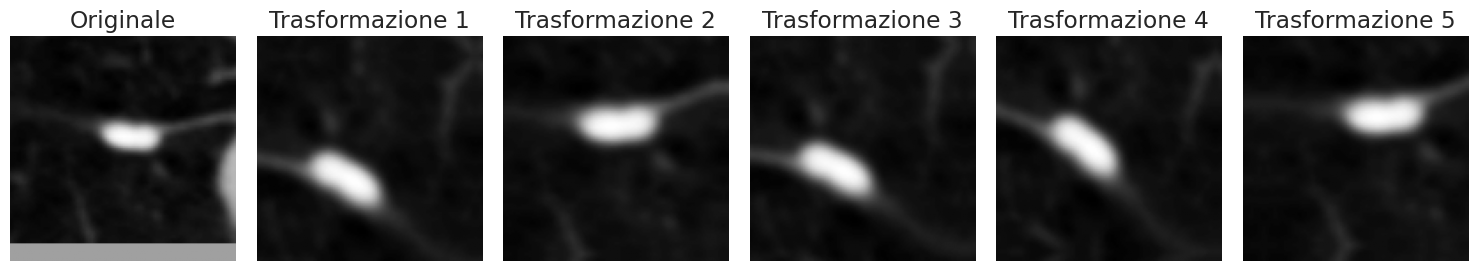

In [ ]:
import keras_cv
from tensorflow.keras.layers import CenterCrop, RandomRotation, RandomTranslation, RandomFlip, RandomZoom, RandomCrop, Resizing
# Define your geometric augmentation layers
augmentation_layers = tf.keras.Sequential([
    CenterCrop(height=96, width=96),
    RandomRotation(0.2),  # Rotate by up to 20%
    RandomTranslation(0.1, 0.1),  # Translate by up to 10% of image height/width
    RandomFlip("horizontal_and_vertical"),  # Flip both horizontally and vertically
    #RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    #RandomCrop(96,96),
    Resizing(input_shape[0], input_shape[1])

])

image=X_train[:5]*255
#image=np.squeeze(X_train[:5]*255)
#image = np.stack([image] * 3, axis=-1)
# Applica la pipeline di augmentation all'immagine
augmented_images = []
for _ in range(5):  # Genera 5 trasformazioni per visualizzare la variazione
    augmented_image = augmentation_layers(image, training=True)
    augmented_images.append(augmented_image[0].numpy())  # Aggiungi la trasformazione alla lista

# Visualizza le immagini
plt.figure(figsize=(15, 5))

# Mostra l'immagine originale
plt.subplot(1, 6, 1)
plt.imshow(image[0][:,:,0].astype(np.uint8),cmap='gray')
plt.title("Originale")
plt.axis('off')

# Mostra le immagini trasformate
for i, aug_img in enumerate(augmented_images):
    plt.subplot(1, 6, i + 2)
    plt.imshow(aug_img[:,:,0].astype(np.uint8),cmap='gray')
    plt.title(f"Trasformazione {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
del augmentation_layers

gc.collect()

11305

In [ ]:
import tensorflow as tf
from keras_cv.layers import RandAugment

# Definizione di RandAugment
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255),  # Adatta il range delle immagini (0-255)
    augmentations_per_image=4,  # Numero di trasformazioni per immagine
    magnitude=0.4,  # Intensità delle trasformazioni
    magnitude_stddev=0.15,  # Deviazione standard per la magnitudine
    rate=1.0,  # Probabilità di applicare ogni trasformazione
)

augmentation_layers = tf.keras.Sequential([
    #CenterCrop(height=96, width=96),
    RandomRotation(0.2),  # Rotate by up to 20%
    RandomTranslation(0.1, 0.1),  # Translate by up to 10% of image height/width
    RandomFlip("horizontal_and_vertical"),  # Flip both horizontally and vertically
    #RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    #RandomCrop(96, 96),
    # Use the imported RandAugment class
    # RandAugment(
    #  value_range=(0, 255),  # Adatta il range delle immagini (0-255)
    #  augmentations_per_image=4,  # Numero di trasformazioni per immagine
    #  magnitude=0.3,  # Intensità delle trasformazioni
    #  magnitude_stddev=0.15,  # Deviazione standard per la magnitudine
    #  rate=1.0,  # Probabilità di applicare ogni trasformazione
    #  seed=42,
    #  ),
    #Resizing(input_shape[0], input_shape[1])
#     keras_cv.layers.AugMix(
#     value_range=(0, 255),  # Adatta al range delle immagini (es. 0-1 o 0-255)
#     severity=0.3,  # Intensità delle trasformazioni (0-10)
#     num_chains=3,  # Numero di catene di trasformazioni
#     chain_depth=3,  # Profondità di ogni catena
#     alpha=1.0,  # Parametro di mixaggio
# ),
])

# augmentation_crop = tf.keras.Sequential([
#     CenterCrop(height=96, width=96),
#     Resizing(input_shape[0], input_shape[1])
# ])


# Creazione dei dataset
batch_size = 128

train_ds = tf.data.Dataset.from_tensor_slices((X_train*255, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val*255, y_val))

train_ds = train_ds.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)

# Funzione per applicare RandAugment
def apply_augmentation(images, labels):
    images = augmentation_layers(images)  # Applica RandAugment solo alle immagini
    return images, labels

# def apply_crop(images, labels):
#    images= augmentation_crop(images)
#    return images, labels

def apply_contrast(images, labels):
    #images = ((process_images((images/255), gain=10))*255)
    return images, labels

# Applica RandAugment al dataset di addestramento
train_ds=train_ds.map(apply_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
#train_ds = train_ds.map(apply_contrast, num_parallel_calls=tf.data.AUTOTUNE)
#validation_dataset = validation_dataset.map(apply_crop, num_parallel_calls=tf.data.AUTOTUNE)


# Funzione di preprocessing per normalizzare le immagini
def preprocess_for_model(images, labels):
    images = tf.cast(images, tf.float32)
    labels=tf.cast(labels, tf.float32)
    return images, labels

# Preprocessing sui dataset
train_ds = train_ds.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)

# Ottimizzazioni
train_ds = train_ds.cache()  # Cache in memoria
train_ds = train_ds.shuffle(buffer_size=1000)  # Mescola il dataset
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)  # Precarica i batch
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


#Custom Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers as tfko

inputs = layers.Input(shape=input_shape, name='input')


x = tfkl.Conv2D(32, 3, padding='same')(inputs)
x = tfkl.BatchNormalization()(x)
x = tfkl.ReLU(name='relu0')(x)
x = tfkl.MaxPooling2D()(x)
x = tfkl.Conv2D(64, 3, padding= 'same')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.ReLU(name='relu1')(x)
x = tfkl.MaxPooling2D()(x)
x = tfkl.Conv2D(128, 3, padding= 'same')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.ReLU(name='relu2')(x)
x = tfkl.MaxPooling2D()(x)
x = tfkl.Conv2D(64, 3, padding= 'same')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.ReLU(name='relu3')(x)
x = tfkl.MaxPooling2D()(x)

# Add GlobalAveragePooling and Dropout
x = tfkl.GlobalAveragePooling2D(name='gap')(x) #already included
x = tfkl.Dense(128, activation='relu', name='dense')(x)
x = tfkl.Dropout(0.3, name='dropout')(x)

# Add a final Dense layer for classification
outputs = tfkl.Dense(output_shape, activation='softmax', name='output')(x)

# Create the model
model = tfk.Model(inputs=inputs, outputs=outputs, name='model')
model = models.Model(inputs, outputs)

# Compile the model with categorical cross-entropy loss and Adam optimiser
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfko.AdamW(learning_rate=1e-4, weight_decay=1e-3), metrics=['accuracy'])

#Display model summary
model.summary(expand_nested=True)


# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu0 (ReLU)                         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu1 (ReLU)                         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu2 (ReLU)                         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu3 (ReLU)                         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap (GlobalAveragePooling2D)         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 177,157 (692.02 KB)

 Trainable params: 176,581 (689.77 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
# Train the model

history = model.fit(
    train_ds,
    epochs=1000,
    #class_weight=class_weight_dict,
    validation_data=validation_dataset,
    callbacks=[tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=50, restore_best_weights=True)]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')


Epoch 1/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 319ms/step - accuracy: 0.1684 - loss: 1.7542 - val_accuracy: 0.1730 - val_loss: 1.9725
Epoch 2/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.1907 - loss: 1.6657 - val_accuracy: 0.1055 - val_loss: 1.7131
Epoch 3/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.2076 - loss: 1.6447 - val_accuracy: 0.1055 - val_loss: 1.6816
Epoch 4/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.2243 - loss: 1.6188 - val_accuracy: 0.1224 - val_loss: 1.6402
Epoch 5/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.2244 - loss: 1.6140 - val_accuracy: 0.1055 - val_loss: 1.6581
Epoch 6/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.2608 - loss: 1.5921 - val_accuracy: 0.1477 - val_loss: 1.5715
Epoch 7/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.2526 - loss: 1.5960 - val_accuracy: 0.2532 - val_loss: 1.5498
Epoch 8/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.2496 - loss: 1.5896 - val_ac

In [ ]:
%cd /content/drive/MyDrive/Applied AI/Anna

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'multitumor_classes_custom_cnn.keras'
model.save(model_filename)
print(f"Model saved as {model_filename} in /content/drive/MyDrive/APPLIED AI/progetto")

# Free memory by deleting the model instance
del model

/content/drive/MyDrive/Applied AI/Anna
Model saved as multitumor_classes_custom_cnn.keras in /content/drive/MyDrive/APPLIED AI/progetto


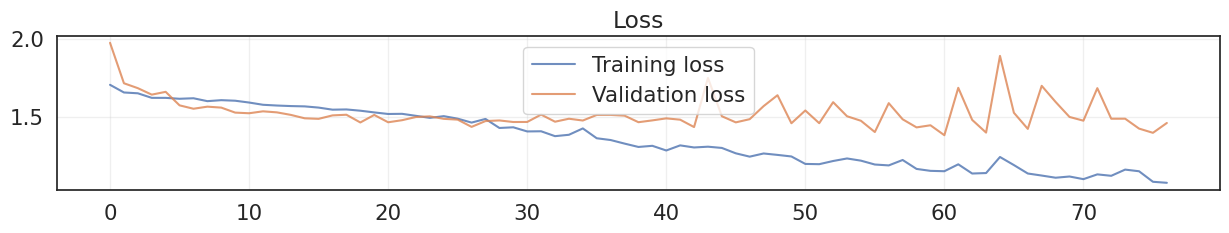

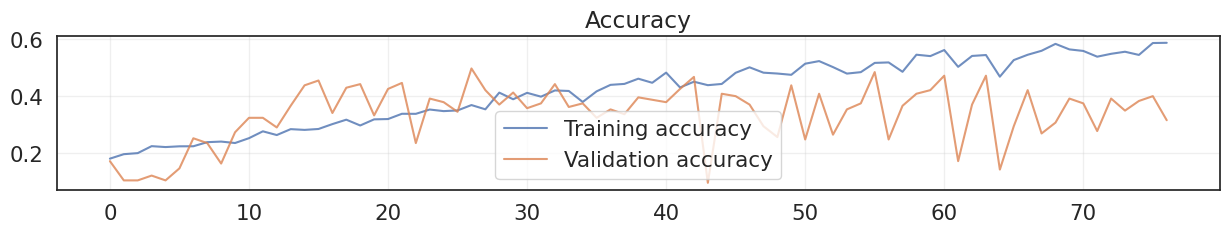

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

##make inference

In [ ]:
%cd /content/drive/MyDrive/Applied AI/Anna
# Load the saved model
model = tfk.models.load_model('multitumor_classes_custom_cnn.keras')

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
#tfk.utils.plot_model(model, show_shapes=True, dpi=70)

/content/drive/MyDrive/Applied AI/Anna


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input (InputLayer)                  │ (None, 128, 128, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_4 (Conv2D)                   │ (None, 128, 128, 32)         │           896 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ batch_normalization_4               │ (None, 128, 128, 32)         │           128 │    Y    │
│ (BatchNormalization)                │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu0 (ReLU)                        │ (None, 128, 128, 32)         │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d_4 (MaxPooling2D)      │ (None, 64, 64, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_5 (Conv2D)                   │ (None, 64, 64, 64)           │        18,496 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ batch_normalization_5               │ (None, 64, 64, 64)           │           256 │    Y    │
│ (BatchNormalization)                │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu1 (ReLU)                        │ (None, 64, 64, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d_5 (MaxPooling2D)      │ (None, 32, 32, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_6 (Conv2D)                   │ (None, 32, 32, 128)          │        73,856 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ batch_normalization_6               │ (None, 32, 32, 128)          │           512 │    Y    │
│ (BatchNormalization)                │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu2 (ReLU)                        │ (None, 32, 32, 128)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d_6 (MaxPooling2D)      │ (None, 16, 16, 128)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_7 (Conv2D)                   │ (None, 16, 16, 64)           │        73,792 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ batch_normalization_7               │ (None, 16, 16, 64)           │           256 │    Y    │
│ (BatchNormalization)                │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu3 (ReLU)                        │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d_7 (MaxPooling2D)      │ (None, 8, 8, 64)             │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ gap (GlobalAveragePoo

 Total params: 530,321 (2.02 MB)

 Trainable params: 176,581 (689.77 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 353,164 (1.35 MB)

In [ ]:
# ipython-input-193-ec9259d9cb7b
# Predict labels for the entire test set
predictions = model.predict(X_test*255, verbose=0)
#predictions=(model.predict(X_test*255) > 0.5).astype("int32") # This line was causing the error
pred_classes = np.argmax(predictions, axis=1)  # Get predicted class labels
# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)

Predictions Shape: (237, 5)


Accuracy score over the test set: 0.4135
Precision score over the test set: 0.3185
Recall score over the test set: 0.4135
F1 score over the test set: 0.343


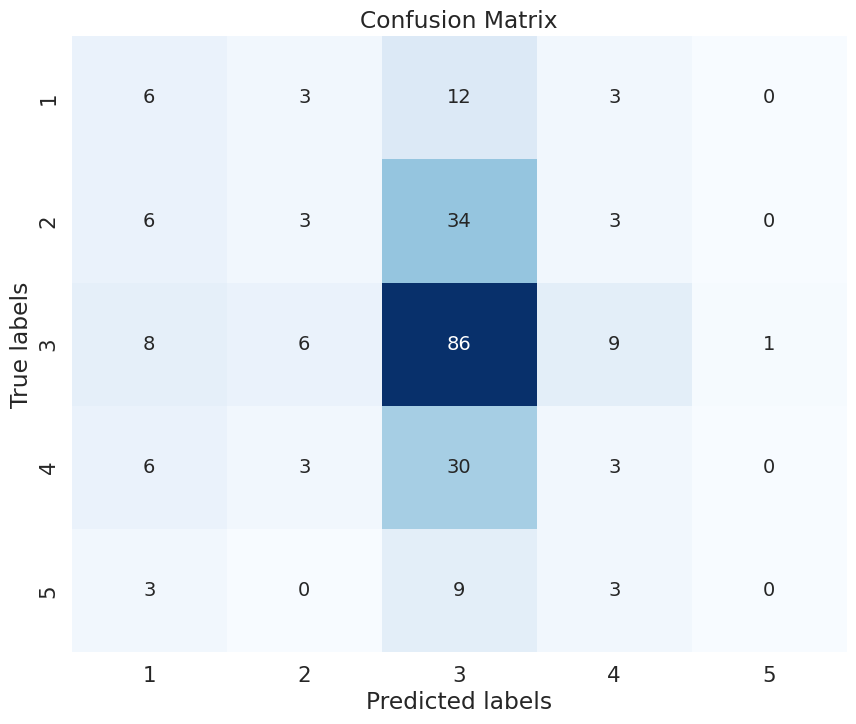

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming 'predictions' contains your model's predictions and 'y_test' contains the true labels
# Replace with your actual data

# Example data (replace with your predictions and true labels)
# predictions = model.predict(X_test)  # Assuming X_test is your test data
# y_test = y_test  # Your true labels
# predictions=np.argmax(predictions, axis=1)

labels = ['1','2', '3','4','5'] #replace with your labels

# Convert predictions to class labels (if needed)
pred_classes = np.argmax(predictions, axis=1)
# Convert y_test to multiclass format by taking the argmax along axis 1
true_classes = np.argmax(y_test, axis=1)  # This line is changed

# Calculate and display metrics
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, average='weighted')
recall = recall_score(true_classes, pred_classes, average='weighted')
f1 = f1_score(true_classes, pred_classes, average='weighted')

print(f'Accuracy score over the test set: {round(accuracy, 4)}')
print(f'Precision score over the test set: {round(precision, 4)}')
print(f'Recall score over the test set: {round(recall, 4)}')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)


# Plot the confusion matrix with class labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion Matrix')
plt.show()


##Explainability

In [ ]:
idx=204
image=X_test[idx]
print(predictions[idx])
print(y_test[idx])

plt.imshow(image[:,:,0], cmap='gray')
plt.show()

In [ ]:
import cv2
from tensorflow.keras.models import Model

def GradCam(model, img_array, layer_name, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model


    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = Model(
			inputs=[model.inputs],
			outputs=[model.get_layer(layer_name).output,
				model.output])

    with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
      inputs = tf.cast(img_array, tf.float32) #we use the preprocessed image
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, 0]
		# use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)

    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]
    # compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

    # grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))
		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    # heatmap = (heatmap * 255).astype("uint8")
		# return the resulting heatmap to the calling function
    return heatmap,predictions

In [ ]:
layer_name = 'conv2d_3' # try also 'conv5_block32_concat'
grad_cam,predictions=GradCam(model,np.expand_dims(X_test[idx]*255, axis=0),layer_name)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import cm  # Import cm from matplotlib


def sigmoid(x, a, b, c):
  return c / (1 + np.exp(-a * (x-b)))

def display_gradcam(img, heatmap):
    # Load the original image
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")  # Use the imported cm module

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))

    #heatmap = sigmoid(heatmap, 50, thresh, 1)

    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM
    plt.imshow(superimposed_img)

display_gradcam(X_test[idx]*255, grad_cam)

#Efficientnet

###base model

In [ ]:
from keras.applications import EfficientNetB2
import keras_cv

efficient=EfficientNetB2(include_top=False, weights='imagenet',  pooling='avg', input_shape=input_shape)
efficient.trainable=False # Freeze all layers for initial transfer learning


31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers as tfko # Import optimizers from tensorflow.keras.optimizers

#inputs = layers.Input(shape=input_shape, name='input')

# Add GlobalAveragePooling and Dropout
#x = tfkl.GlobalAveragePooling2D(name='gap')(x) #already included
#x = tfkl.Dropout(0.3, name='dropout')(x)
x=tfkl.Dense(64, activation='relu', name='dense')(efficient.output)
x = tfkl.Dropout(0.3, name='dropout')(x)

# Add a final Dense layer for classification
outputs = tfkl.Dense(5, activation='softmax', name='output')(x)

# Create the model
model = tfk.Model(inputs=efficient.input, outputs=outputs, name='model')
model = models.Model(efficient.input, outputs)

# Compile the model with categorical cross-entropy loss and Adam optimiser
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfko.AdamW(learning_rate=1e-4, weight_decay=1e-3), metrics=['accuracy'])

#Display model summary
model.summary(expand_nested=True)


# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,859,070 (29.98 MB)

 Trainable params: 90,501 (353.52 KB)

 Non-trainable params: 7,768,569 (29.63 MB)

In [ ]:
# prompt: compute class weights considering y_train is one_hot encoded

from sklearn.utils.class_weight import compute_class_weight

# Assuming y_train is your one-hot encoded target variable.
# First, convert the one-hot encoded labels back to integers.
y_train_integers = np.argmax(y_train, axis=1)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)

# Convert the class weights to a dictionary for use in model training
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)


Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


In [ ]:
# Train the model

history = model.fit(
    train_ds,
    epochs=1000,
    class_weight=class_weight_dict,
    validation_data=validation_dataset,
    callbacks=[tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True)]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')


Epoch 1/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.2200 - loss: 1.6594 - val_accuracy: 0.2152 - val_loss: 1.6259
Epoch 2/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.2577 - loss: 1.5864 - val_accuracy: 0.2489 - val_loss: 1.5766
Epoch 3/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.3143 - loss: 1.5435 - val_accuracy: 0.2574 - val_loss: 1.5761
Epoch 4/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.3346 - loss: 1.5244 - val_accuracy: 0.2785 - val_loss: 1.5370
Epoch 5/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.3399 - loss: 1.5031 - val_accuracy: 0.2743 - val_loss: 1.5264
Epoch 6/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.4012 - loss: 1.4404 - val_accuracy: 0.3038 - val_loss: 1.5166
Epoch 7/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.3940 - loss: 1.4376 - val_accuracy: 0.2954 - val_loss: 1.5050
Epoch 8/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.3962 - loss: 1.4117 - val_accur

In [ ]:
%cd /content/drive/MyDrive/Applied AI/Anna

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'multitumor_classes_trainaugmented.keras'
model.save(model_filename)

# Free memory by deleting the model instance
del model

/content/drive/MyDrive/Applied AI/Anna


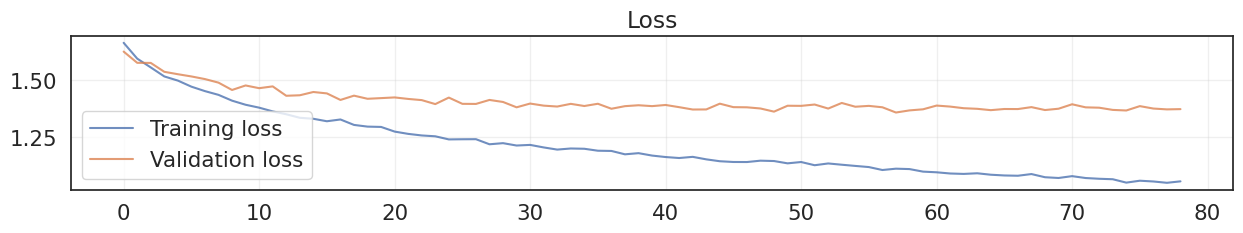

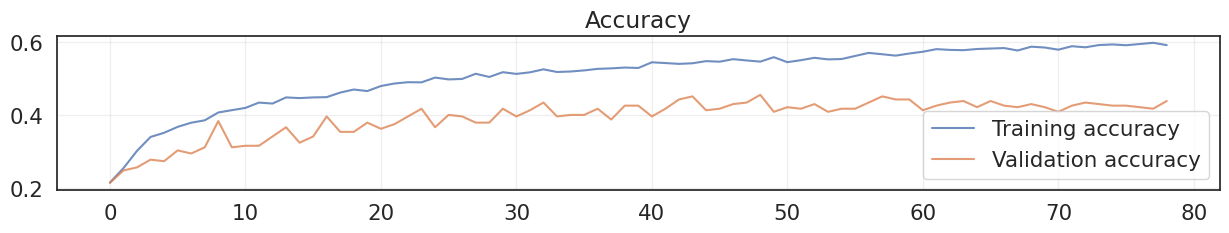

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

###fine tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

%cd /content/drive/MyDrive/Applied AI/Anna

model = load_model('multitumor_classes_trainaugmented.keras')

#Display summary
model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

/content/drive/MyDrive/Applied AI/Anna


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 8,040,074 (30.67 MB)

 Trainable params: 90,501 (353.52 KB)

 Non-trainable params: 7,768,569 (29.63 MB)

 Optimizer params: 181,004 (707.05 KB)

In [ ]:
# Set all layers in efficientnetb0 as trainable
model.trainable = True

# Set all layers as non-trainable
for layer in model.layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
       # print(i, layer.name, type(layer).__name__, layer.trainable)

# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(model.layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


model.summary(expand_nested=True)


# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

0 input_layer_2 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_re

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 8,040,074 (30.67 MB)

 Trainable params: 7,488,536 (28.57 MB)

 Non-trainable params: 370,534 (1.41 MB)

 Optimizer params: 181,004 (707.05 KB)

In [ ]:
print(f"Min value in X_train: {np.min(X_test*255)}")
print(f"Max value in X_train: {np.max(X_test*255)}")


Min value in X_train: 39.79810333251953
Max value in X_train: 254.3444061279297


##training

In [ ]:
# Define the patience value for early stopping
patience = 40

# Create an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True,
)

# Store the callback in a list
callbacks = [early_stopping]

In [ ]:
# Compile the model
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfko.AdamW(learning_rate=1e-5, weight_decay=1e-3), metrics=['accuracy'])

# Display a summary of the model architecture
model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,859,070 (29.98 MB)

 Trainable params: 7,488,536 (28.57 MB)

 Non-trainable params: 370,534 (1.41 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=validation_dataset,
    class_weight=class_weight_dict,
    epochs=1000,
    callbacks=callbacks
).history


# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')



Epoch 1/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.5718 - loss: 1.1032 - val_accuracy: 0.4641 - val_loss: 1.3518
Epoch 2/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 52s 129ms/step - accuracy: 0.6033 - loss: 1.0388 - val_accuracy: 0.4557 - val_loss: 1.3341
Epoch 3/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.5851 - loss: 1.0679 - val_accuracy: 0.4219 - val_loss: 1.3724
Epoch 4/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.5936 - loss: 1.0405 - val_accuracy: 0.4641 - val_loss: 1.3190
Epoch 5/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.6026 - loss: 1.0282 - val_accuracy: 0.4599 - val_loss: 1.3459
Epoch 6/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.5985 - loss: 1.0347 - val_accuracy: 0.4219 - val_loss: 1.3575
Epoch 7/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.5863 - loss: 1.0234 - val_accuracy: 0.4557 - val_loss: 1.3364
Epoch 8/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6012 - loss: 0.9987

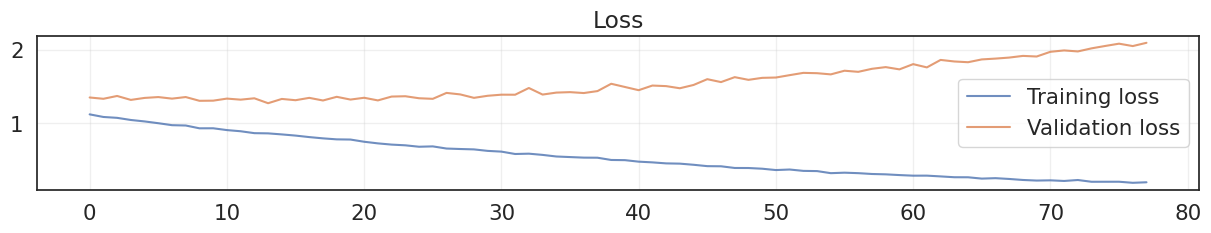

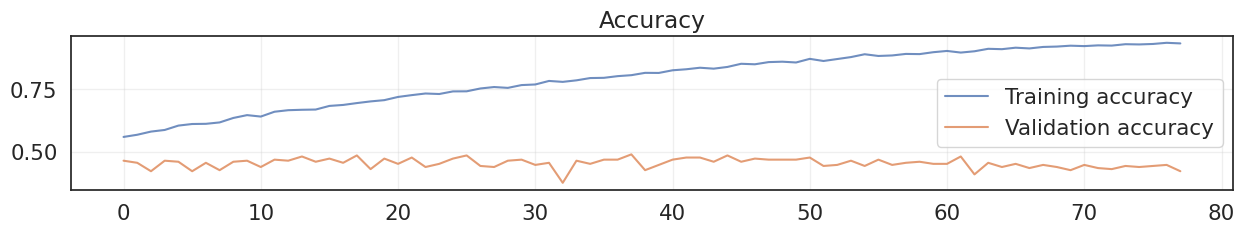

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Format the filename to avoid special character issues
# Replace decimal point in accuracy with underscore, or convert to an integer
formatted_accuracy = str(final_val_accuracy).replace('.', '_')
model_filename = 'multitumor_classes_trainaugmented_ft.keras'

# Save model to the Homework directory
model.save(model_filename)
print(f"Model saved as {model_filename}")

Model saved as multitumor_classes_trainaugmented_ft.keras


##make inference

In [ ]:
%cd /content/drive/MyDrive/Applied AI/Anna
# Load the saved model
model = tfk.models.load_model('multitumor_classes_trainaugmented_ft.keras')

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ipython-input-193-ec9259d9cb7b
# Predict labels for the entire test set
predictions = model.predict(X_test*255, verbose=0)
#predictions=(model.predict(X_test*255) > 0.5).astype("int32") # This line was causing the error
pred_classes = np.argmax(predictions, axis=1)  # Get predicted class labels
# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)

Predictions Shape: (237, 5)


In [ ]:
labels = ['1','2','3','4','5']

Accuracy score over the test set: 0.4473
Precision score over the test set: 0.4647
Recall score over the test set: 0.4473
F1 score over the test set: 0.4463


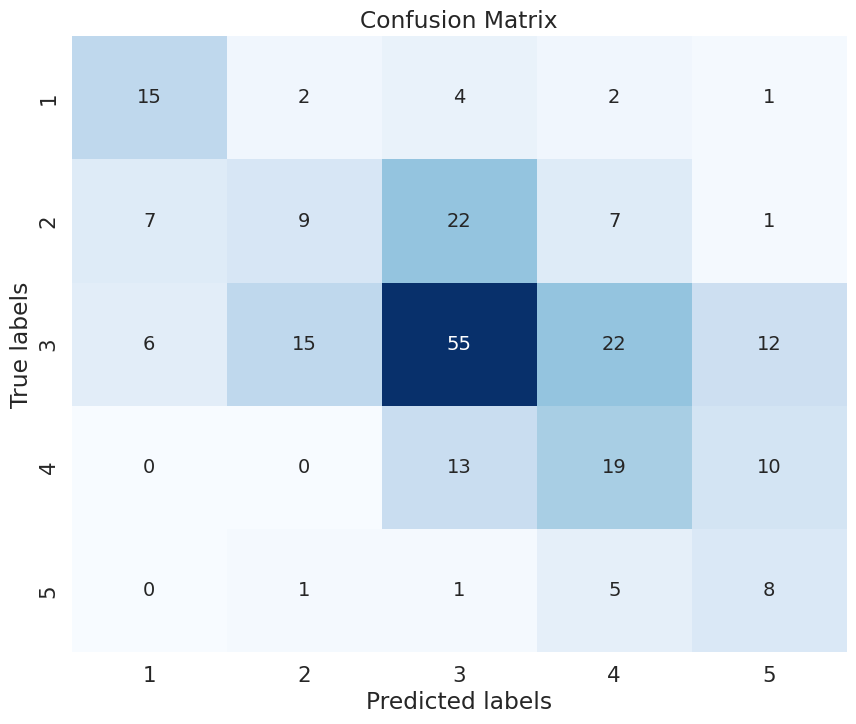

In [ ]:
# ipython-input-195-ec9259d9cb7b
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions and ground truth to class labels
#pred_classes = predictions  # This line was causing the error
#true_classes = y_test      # This line was causing the error
true_classes = np.argmax(y_test, axis=1)  # Get true class labels

# Calculate and display metrics
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, average='weighted')
recall = recall_score(true_classes, pred_classes, average='weighted')
f1 = f1_score(true_classes, pred_classes, average='weighted')

print(f'Accuracy score over the test set: {round(accuracy, 4)}')
print(f'Precision score over the test set: {round(precision, 4)}')
print(f'Recall score over the test set: {round(recall, 4)}')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Define class labels (e.g., ['Class 0', 'Class 1', ...])
class_labels = labels  # Replace `labels` with your list of actual class names

# Plot the confusion matrix with class labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', cbar=False)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf

def compute_confidence_metrics_numpy(model, X_test, y_test):
    """
    Computes confidence estimation based on predicted and true labels for a NumPy dataset.

    Args:
        model (tf.keras.Model): Trained Keras model.
        X_test (np.array): NumPy array of test images (N, H, W, C).
        y_test (np.array): One-hot encoded true labels (N, num_classes).

    Returns:
        pred_confidence (dict): Average confidence per predicted class.
        true_confidence (dict): Average confidence per true class.
    """
    # Convert one-hot encoded labels to class indices
    y_test = np.argmax(y_test, axis=1)  # Shape: (N,)

    # Get softmax probabilities from model
    softmax_probs = model.predict(X_test, verbose=0)  # Shape: (N, num_classes)
    predicted_labels = np.argmax(softmax_probs, axis=1)  # Model predictions

    num_classes = softmax_probs.shape[1]

    # Store confidence values for each class
    pred_confidence = {}
    true_confidence = {}

    for c in range(num_classes):
        # Confidence per predicted class
        pred_indices = np.where(predicted_labels == c)[0]  # Indices where model predicted class c
        if len(pred_indices) > 0:
            pred_confidence[c] = np.mean(softmax_probs[pred_indices, c])  # Avg softmax for predicted class

        # Confidence per true class
        true_indices = np.where(y_test == c)[0]  # Indices where true label is class c
        if len(true_indices) > 0:
            true_confidence[c] = np.mean(softmax_probs[true_indices, c])  # Avg softmax for true class

    return pred_confidence, true_confidence

# Example Usage:
# Assuming 'X_test' is your NumPy array of test images and 'y_test' contains the true labels (one-hot encoded)
pred_conf, true_conf = compute_confidence_metrics_numpy(model, X_test*255, y_test)

# Print results
print("Confidence based on Predicted Labels:", pred_conf)
print("Confidence based on True Labels:", true_conf)


Confidence based on Predicted Labels: {0: 0.695886, 1: 0.53203696, 2: 0.62732804, 3: 0.61925405, 4: 0.7518957}
Confidence based on True Labels: {0: 0.45862636, 1: 0.22410059, 2: 0.3970833, 3: 0.3888868, 4: 0.5389961}


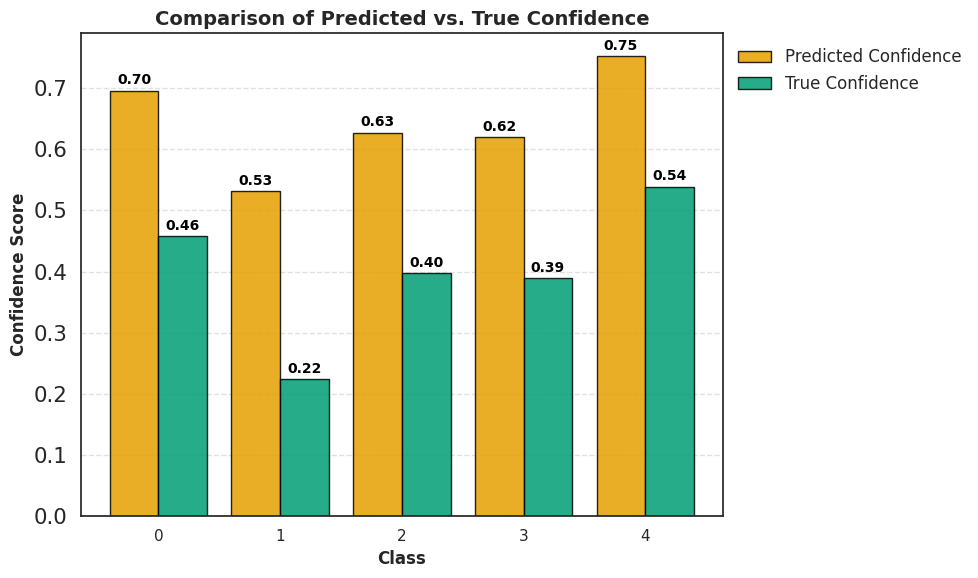

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert dictionaries to lists for plotting
classes = list(pred_conf.keys())  # Assuming same keys for both
predicted_conf = [pred_conf[c] for c in classes]
true_conf = [true_conf[c] for c in classes]

# Define width for bars
bar_width = 0.4
x_indexes = np.arange(len(classes))

# Create figure
plt.figure(figsize=(10, 6))

# Define custom colors
predicted_color = "#E69F00"  # Orange
true_color = "#009E73"  # Green

# Plot bars with rounded edges
bars1 = plt.bar(x_indexes - bar_width/2, predicted_conf, width=bar_width, color=predicted_color, edgecolor='black', label="Predicted Confidence", alpha=0.85)
bars2 = plt.bar(x_indexes + bar_width/2, true_conf, width=bar_width, color=true_color, edgecolor='black', label="True Confidence", alpha=0.85)

# Add labels above bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{bar.get_height():.2f}",
             ha='center', fontsize=10, fontweight='bold', color='black')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{bar.get_height():.2f}",
             ha='center', fontsize=10, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Class", fontsize=12, fontweight='bold')
plt.ylabel("Confidence Score", fontsize=12, fontweight='bold')
plt.title("Comparison of Predicted vs. True Confidence", fontsize=14, fontweight='bold')

# X-axis labels
plt.xticks(x_indexes, classes, fontsize=11)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, frameon=False)

# Improve layout to fit legend outside
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def compute_confidence_distribution(model, X_test, y_test):
    """
    Computes the distribution of confidence for predicted labels.

    Args:
        model (tf.keras.Model): Trained Keras model.
        X_test (np.array): NumPy array of test images (N, H, W, C).
        y_test (np.array): One-hot encoded true labels (N, num_classes).

    Returns:
        pred_confidence_dist (list): Confidence values for each prediction.
    """
    # Get softmax probabilities from the model
    softmax_probs = model.predict(X_test, verbose=0)  # Shape: (N, num_classes)
    predicted_labels = np.argmax(softmax_probs, axis=1)  # Model predictions

    # Confidence values for predicted labels (maximum softmax probability for each prediction)
    pred_confidence_dist = [softmax_probs[i, predicted_labels[i]] for i in range(len(predicted_labels))]

    return pred_confidence_dist

# Example Usage
# Assuming 'X_test' is your test data and 'y_test' contains the true labels (one-hot encoded)
pred_confidence_dist = compute_confidence_distribution(model, X_test*255, y_test)


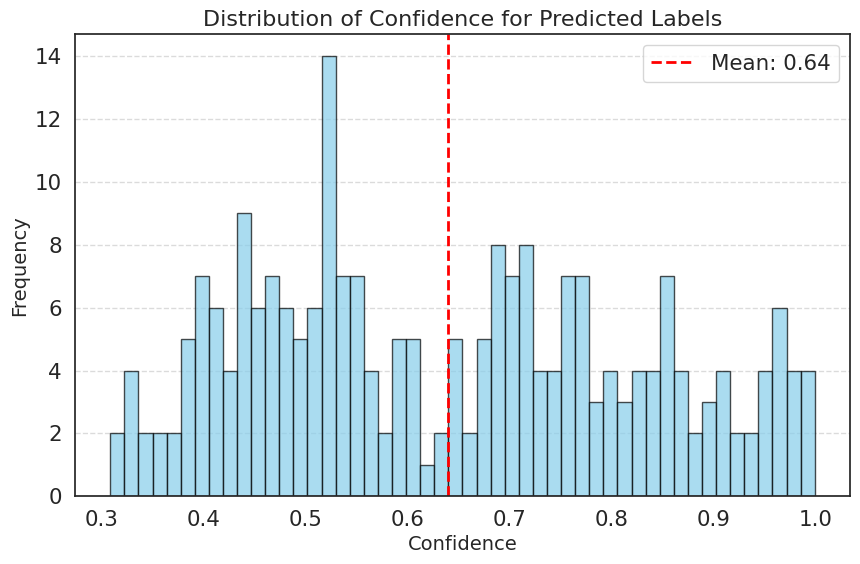

Mean confidence value: 0.63951737


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute mean confidence value
mean_confidence = np.mean(pred_confidence_dist)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(pred_confidence_dist, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_confidence, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_confidence:.2f}')

# Labels and title
plt.xlabel("Confidence", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Confidence for Predicted Labels", fontsize=16)

# Grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()

# Print mean confidence value
print('Mean confidence value:', mean_confidence)


##Explainability

[1. 0. 0. 0. 0.]
[0.43054226 0.23474579 0.3020218  0.03042547 0.00226471]


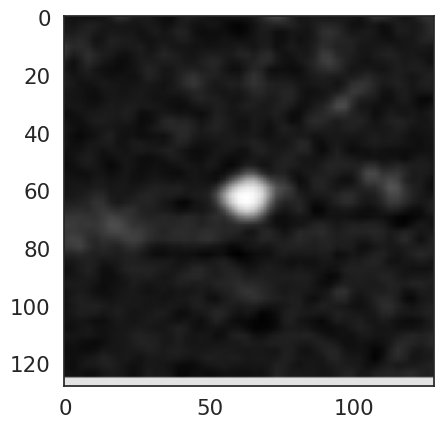

In [ ]:
idx=30
print(y_test[idx])
print(predictions[idx])
image=X_test[idx]

plt.imshow(image[:,:,0], cmap='gray')
plt.show()

###GradCam

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model

def GradCam(model, img_array, layer_name, eps=1e-8, target_class=0):
    """
    Calcola separatamente la Grad-CAM heatmap e le predizioni utilizzando due modelli differenti.

    Args:
      model_gradcam: Modello (o submodello) utilizzato per il calcolo della Grad-CAM.
                     Es. la parte del modello che include EfficientNetB2.
      model_pred:    Modello completo utilizzato per ottenere le predizioni.
      img_array:     Immagine pre-elaborata (numpy array con shape [batch, height, width, channels]).
      layer_name:    Nome del layer (in model_gradcam) da cui calcolare la Grad-CAM.
      eps:           Valore per evitare divisioni per zero nella normalizzazione.

    Returns:
      heatmap:      Numpy array della Grad-CAM normalizzato (shape: [img_height, img_width]).
      predictions:  Predizioni ottenute da model_pred.
    """

    # --- Creazione del modello per la Grad-CAM ---
    # Estrae l'output del layer specificato all'interno di model_gradcam
    conv_layer = model.get_layer(layer_name).output
    gradModel = Model(inputs=model.input, outputs=[conv_layer, model.output])

    # --- Calcolo delle predizioni con il modello separato ---
    predictions = model.predict(img_array)

    # --- Calcolo della Grad-CAM ---
    with tf.GradientTape() as tape:
        # Assicuriamoci che l'input sia in formato float32
        inputs = tf.cast(img_array, tf.float32)
        # Eseguiamo il modello per ottenere:
        # - convOutputs: le feature maps del layer di interesse
        # - predictions_grad: l'output di model_gradcam (usato per il calcolo dei gradienti)
        convOutputs, predictions_grad = gradModel(inputs)
        # Scegliamo una classe target (qui ad esempio la prima classe, indice 0)
        loss = predictions_grad[:, target_class]

    # Calcola i gradienti della loss rispetto alle feature maps
    grads = tape.gradient(loss, convOutputs)

    # Applica la tecnica di guided backpropagation: considera solo i valori positivi
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads

    # Rimuovi la dimensione batch (si assume di avere un'unica immagine)
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]

    # Calcola i pesi mediando i gradienti lungo le dimensioni spaziali (height e width)
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    # Combina i pesi con le feature maps per ottenere la mappa di attivazione (CAM)
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

    # Ridimensiona la mappa alle dimensioni originali dell'immagine
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))

    # Normalizza la heatmap in modo che i valori siano compresi tra 0 e 1
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom

    return heatmap, predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


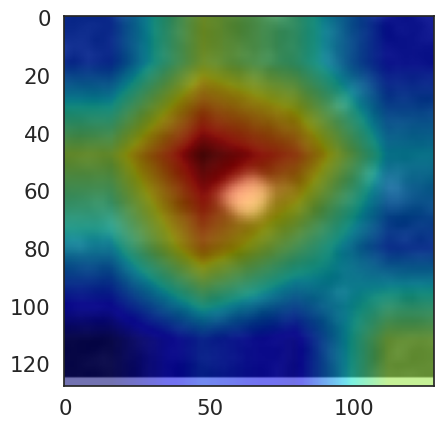

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import cm  # Import cm from matplotlib


def sigmoid(x, a, b, c):
  return c / (1 + np.exp(-a * (x-b)))

def display_gradcam(img, heatmap):
    # Load the original image
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")  # Use the imported cm module

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))

    #heatmap = sigmoid(heatmap, 50, thresh, 1)

    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM
    plt.imshow(superimposed_img)

layer_name = 'top_conv' # try also 'conv5_block32_concat'
grad_cam,predictions_grad=GradCam(model,np.expand_dims(X_test[idx]*255, axis=0),layer_name)
display_gradcam(X_test[idx]*255, grad_cam)

In [ ]:
for layer in model.layers:
    print(layer.name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


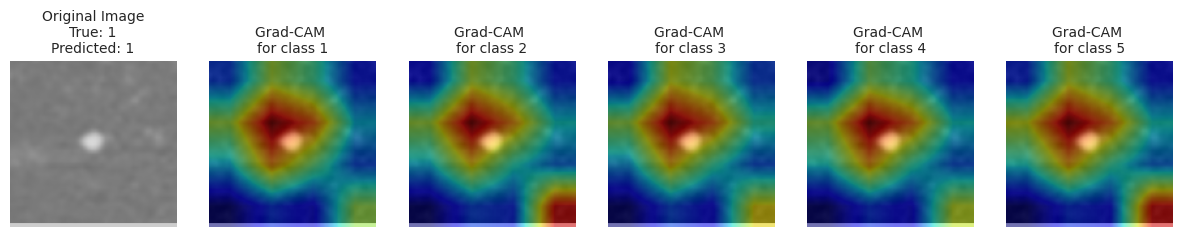

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tensorflow.keras.models import Model
import cv2

layer_name='top_conv'
idx= 30

def display_gradcam(img, heatmap):
    img = tf.keras.preprocessing.image.img_to_array(img)
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img


def plot_gradcam_with_image(idx):
    fig = plt.figure(figsize=(15, 7))
    outer = gridspec.GridSpec(1, 6, wspace=0.2, hspace=0.2)

    # Original Image
    ax = plt.Subplot(fig, outer[0])
    ax.imshow(X_test[idx])
    ax.set_title(f"Original Image\nTrue: {labels[np.argmax(y_test[idx])]}\nPredicted: {labels[np.argmax(predictions[idx])]}", size=10)
    ax.axis('off')
    fig.add_subplot(ax)

    for i in range(5):
        grad_cam, _ = GradCam(model, np.expand_dims(X_test[idx]*255, axis=0), layer_name, target_class=i)
        ax = plt.Subplot(fig, outer[i+1])
        superimposed_image = display_gradcam(X_test[idx] * 255, grad_cam)
        ax.imshow(superimposed_image)
        ax.set_title(f"Grad-CAM \nfor class {labels[i]}", size=10)
        ax.axis('off')
        fig.add_subplot(ax)
    plt.show()

plot_gradcam_with_image(idx)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


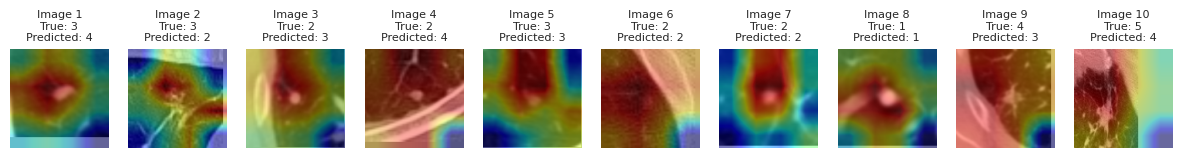

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy as np
from tensorflow.keras.models import Model
import tensorflow as tf
import cv2

def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

def display_gradcam(img, heatmap):
    # Load the original image
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")  # Use the imported cm module

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))

    # heatmap = sigmoid(heatmap, 50, thresh, 1)

    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    # changed from superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Return superimposed_img
    return superimposed_img

layer_name = 'top_conv'  # Replace with your layer name
target_class = 3  # Class index for Grad-CAM

fig = plt.figure(figsize=(15, 7))
outer = gridspec.GridSpec(1, 10, wspace=0.2, hspace=0.2)  # Adjust the number of columns

for i in range(10):
    idx = i  # Select indices from test set
    grad_cam, _ = GradCam(model, np.expand_dims(X_test[idx] * 255, axis=0), layer_name, target_class=np.argmax(predictions[idx]))
    ax = plt.Subplot(fig, outer[i])
    superimposed_image = display_gradcam(X_test[idx] * 255, grad_cam)
    ax.imshow(superimposed_image)
    ax.set_title(f"Image {i + 1}\nTrue: {labels[np.argmax(y_test[idx])]}\nPredicted: {labels[np.argmax(predictions[idx])]}", size=8)
    ax.axis('off')
    fig.add_subplot(ax)

plt.show()

###Image retrival

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


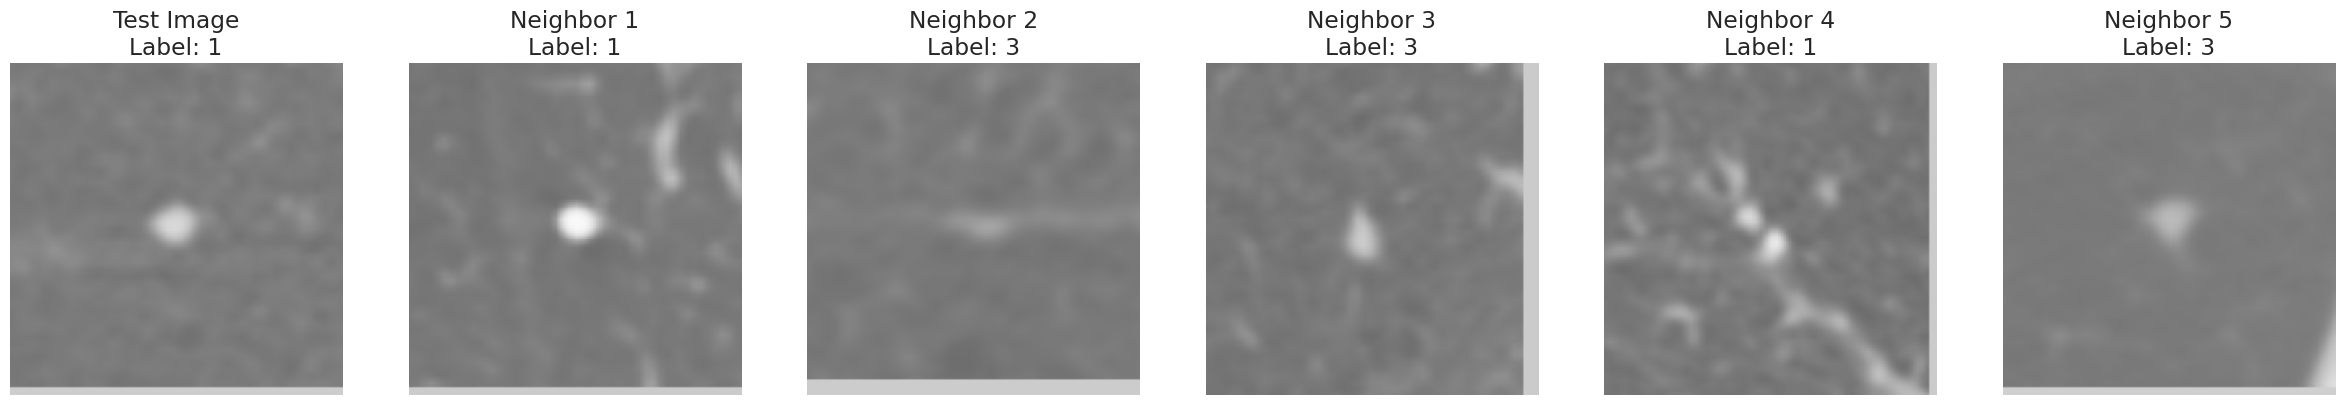

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


# Trova l'ultimo layer convoluzionale
feature_extractor = model.get_layer('top_conv')  # Assicurati che questo sia il nome del layer che desideri
# Crea un nuovo modello con l'output dell'ultimo layer convoluzionale
feature_extractor = Model(inputs=model.input, outputs=feature_extractor.output)


# Indice dell'immagine di test
idx_img = 30

# Add an extra dimension to represent a batch of size 1
# Reshape X_train_sample to have the channel dimension (assuming it's grayscale)
#X_train_sample = X_train_val[0:100, np.newaxis] # Reshape if X_train_val is (2126, 124, 124)

# If your original X_train_val is (2126, 124, 124), you need to
# stack 3 copies to simulate 3 channels (RGB) for EfficientNetB2
X_train_sample = np.stack([X_train_val[0:100]] * 3, axis=-1)
y_train_sample = y_train_val[0:100]

#If the image is in RGB format, use this:
#X_train_sample = np.stack([X_train_val[:, :, :, 0]] * 3, axis=-1)
# or even better, use your original X_train_val if the image is already in RGB format
# X_train_sample = X_train_val # Assuming X_train_val is (2126, 124, 124, 3)


# Estrai le caratteristiche per l'immagine di test
image_features = feature_extractor.predict(np.expand_dims(X_test[idx_img]*255, axis=0))

features = feature_extractor.predict(X_train_sample*255, batch_size=10, verbose=0)

# Converti le etichette da one-hot a formato categorico
y_train_sample_categorical = np.argmax(y_train_sample, axis=1)
test_label_categorical = np.argmax(y_test[idx_img])

# Estrai le caratteristiche dal sottoinsieme del dataset
#features = feature_extractor.predict(X_train_sample, batch_size=10, verbose=0) #This line is redundant

# Calcola le distanze tra le caratteristiche
# Modified to calculate the mean distance over the spatial dimensions
distances = np.mean(np.abs(features - image_features), axis=(1, 2, 3))

# Ottieni gli indici ordinati in base alle distanze
sorted_indices = distances.argsort()

# Utilizza gli indici ordinati per selezionare le immagini e le etichette
ordered_images = X_train_sample[sorted_indices]
ordered_labels = y_train_sample_categorical[sorted_indices]

# Visualizza l'immagine di test e le 5 più vicine
plt.figure(figsize=(30, 10))

# Mostra l'immagine di test con la sua etichetta
plt.subplot(1, 6, 1)
plt.imshow(X_test[idx_img])
plt.title(f"Test Image\nLabel: {labels[test_label_categorical]}")
plt.axis('off')

# Mostra le 5 immagini più vicine con le loro etichette
for i in range(5):
    plt.subplot(1, 6, i + 2)
    # Select the image with 3 channels to display
    plt.imshow(ordered_images[i])
    plt.title(f"Neighbor {i+1}\nLabel: {labels[ordered_labels[i]]}")
    plt.axis('off')

plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf

# def occlusion_sensitivity(model, image, patch_size=10, step=5):
#     """Analizza l'importanza delle regioni occludendole"""
#     # Convert the image to a NumPy array to use .copy()
#     #image = image.numpy()  # Added this line to convert to NumPy

#     img_height, img_width, _ = image.shape
#     heatmap = np.zeros((img_height, img_width))

#     for y in range(0, img_height, step):
#         for x in range(0, img_width, step):
#             # Crea una copia dell'immagine
#             occluded_image = image.copy()

#             # Oscura un rettangolo (patch_size x patch_size)
#             occluded_image[y:y+patch_size, x:x+patch_size, :] = 0

#             # Espandi le dimensioni per la previsione
#             input_tensor = np.expand_dims(occluded_image, axis=0)
#             pred = model.predict(input_tensor)[0]

#             #  Get the predicted class instead of probabilities
#             pred_class = np.argmax(pred)

#             # Save the predicted class to the heatmap
#             heatmap[y:y+patch_size, x:x+patch_size] = pred_class #changed this line


#     return heatmap

# # Esempio d'uso
# image = X_test[122]*255  # Assumi che sia un'immagine pre-processata
# # Convert image to NumPy before passing to occlusion_sensitivity
# #<image_np = image.numpy()  # Added this line to convert to NumPy
# heatmap = occlusion_sensitivity(model, image)  # Pass the NumPy array

# # Visualizza l'heatmap
# plt.imshow(image/255)
# plt.imshow(heatmap, cmap="jet", alpha=0.5)
# plt.colorbar()
# plt.show()

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=930faf431ecc9fa1467e9763e512bfae0c9b6133a5f7b1815eb4785a19713f6c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5

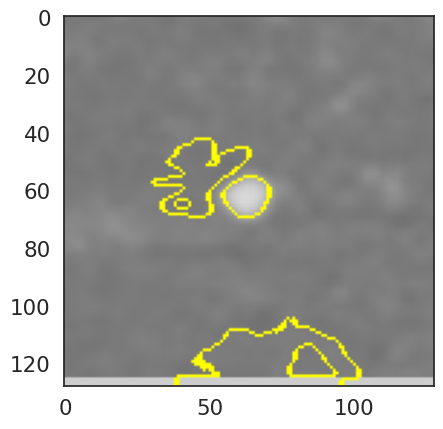

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Crea l'oggetto LIME
explainer = lime_image.LimeImageExplainer()

# Spiega la predizione
explanation = explainer.explain_instance(
    X_test[30]*255,
    model.predict,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Visualizza il risultato
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

plt.imshow(mark_boundaries(temp/255, mask))
plt.show()


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def saliency_map(model, image):
    """Calcola la mappa di salienza per un'immagine"""
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = prediction[:, 0]  # Classe target

    grads = tape.gradient(loss, image)[0]
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)

    return saliency.numpy()

# Calcola la mappa di salienza
saliency = saliency_map(model, X_test[122]*255)

# Visualizza la mappa di salienza
plt.imshow(X_test[122])
plt.imshow(saliency, cmap="hot", alpha=0.6)
plt.colorbar()
plt.show()
